In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint






In [56]:
# Importing data
path = "/content/survey.csv"
train_df = pd.read_csv(path)

In [57]:
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,Company_work,wellness_program,seek_help,anonymity,mental_health_consequence,friends,Elders,obs_consequence
0,37,Female,NaN,No,Yes,Often,Yes,No,Yes,Yes,No,Some of them,Yes,No
1,44,M,NaN,No,No,Rarely,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,NaN,No,No,Rarely,Yes,No,No,Don't know,No,Yes,Yes,No
3,31,Male,NaN,Yes,Yes,Often,Yes,No,No,No,Yes,Some of them,No,Yes
4,31,Male,NaN,No,No,Never,Yes,Don't know,Don't know,Don't know,No,Some of them,Yes,No


In [58]:
train_df.shape

(1259, 14)

In [59]:

# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender','self_employed', 'family_history', 'treatment', 'work_interfere',
                 'Company_work', 'anonymity',  'mental_health_consequence',
                  'friends', 'Elders',
                 'obs_consequence', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)

train_df.head(5) 

,Age,Gender,self_employed,family_history,treatment,work_interfere,Company_work,wellness_program,seek_help,anonymity,mental_health_consequence,friends,Elders,obs_consequence
0,37,Female,NaN,No,Yes,Often,Yes,No,Yes,Yes,No,Some of them,Yes,No
1,44,M,NaN,No,No,Rarely,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,NaN,No,No,Rarely,Yes,No,No,Don't know,No,Yes,Yes,No
3,31,Male,NaN,Yes,Yes,Often,Yes,No,No,No,Yes,Some of them,No,Yes
4,31,Male,NaN,No,No,Never,Yes,Don't know,Don't know,Don't know,No,Some of them,Yes,No


In [60]:
#clean 'Gender'
#lower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [61]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)


In [62]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [63]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [64]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)



train_df.head()


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_Company_work ['No', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_friends ['No', 'Some of them', 'Yes']
label_Elders ['No', 'Some of them', 'Yes']
label_obs_consequence ['No', 'Yes']
label_age_range ['0-20', '21-30', '31-65', '66-100']


,Age,Gender,self_employed,family_history,treatment,work_interfere,Company_work,wellness_program,seek_help,anonymity,mental_health_consequence,friends,Elders,obs_consequence,age_range
0,19,0,0,0,1,2,1,1,2,2,1,1,2,0,2
1,26,1,0,0,0,3,0,0,0,0,0,0,0,0,2
2,14,1,0,0,0,3,1,1,1,0,1,2,2,0,2
3,13,1,0,1,1,2,1,1,1,1,2,1,0,1,2
4,13,1,0,0,0,1,1,0,0,0,1,1,2,0,2


In [65]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
Company_work                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
mental_health_consequence      0      0.0
friends                        0      0.0
Elders                         0      0.0
obs_consequence                0      0.0
age_range                      0      0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

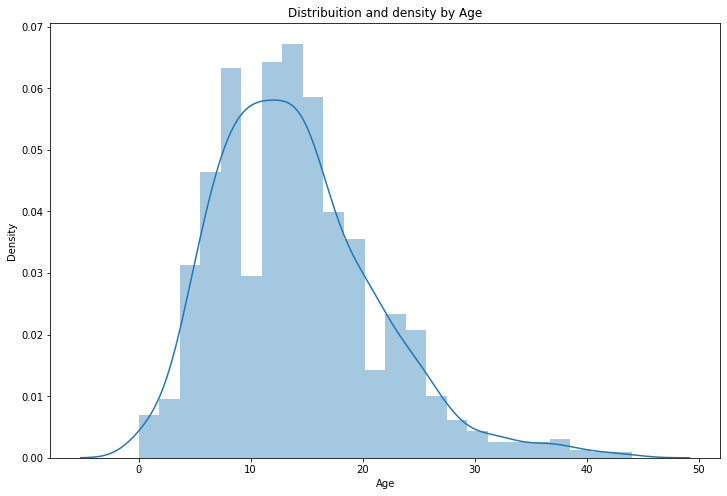

In [66]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


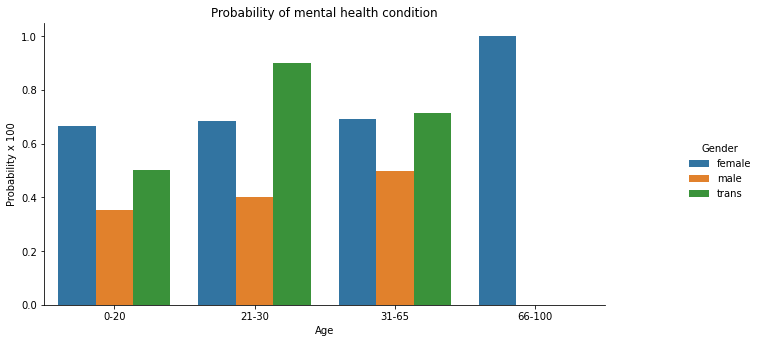

In [67]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


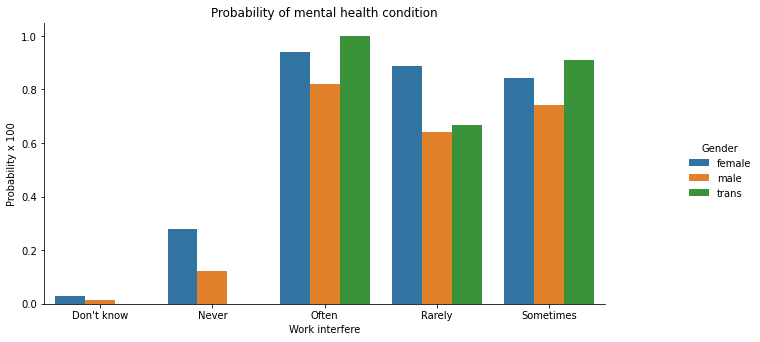

In [68]:
o = labelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [ ]:
# # prep
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# # models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# # Validation libraries
# from sklearn import metrics
# from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
# from sklearn.model_selection import cross_val_score

# #Neural Network
# from sklearn.neural_network import MLPClassifier
# # from sklearn.grid_search import RandomizedSearchCV

In [ ]:
# # Scaling Age
# scaler = MinMaxScaler()
# train_df['Age'] = scaler.fit_transform(train_df[['Age']])
# train_df.head()

In [24]:
# # define X and y
# feature_cols = ['Age', 'Gender', 'family_history',  'anonymity', 'work_interfere']
# X = train_df[feature_cols]
# y = train_df.treatment

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# # Create dictionaries for final graph
# # Use: methodDict['Stacking'] = accuracy_score
# methodDict = {}
# rmseDict = ()

In [25]:
# import tensorflow as tf
# import argparse


# batch_size = 100
# train_steps = 1000

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# def train_input_fn(features, labels, batch_size):
#     """An input function for training"""
#     # Convert the inputs to a Dataset.
#     dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

#     # Shuffle, repeat, and batch the examples.
#     return dataset.shuffle(1000).repeat().batch(batch_size)

# def eval_input_fn(features, labels, batch_size):
#     """An input function for evaluation or prediction"""
#     features=dict(features)
#     if labels is None:
#         # No labels, use only features.
#         inputs = features
#     else:
#         inputs = (features, labels)

#     # Convert the inputs to a Dataset.
#     dataset = tf.data.Dataset.from_tensor_slices(inputs)

#     # Batch the examples
#     assert batch_size is not None, "batch_size must not be None"
#     dataset = dataset.batch(batch_size)

#     # Return the dataset.
#     return dataset

In [26]:
# # Define Tensorflow feature columns
# age = tf.feature_column.numeric_column("Age")
# gender = tf.feature_column.numeric_column("Gender")
# family_history = tf.feature_column.numeric_column("family_history")
# anonymity = tf.feature_column.numeric_column("anonymity")
# work_interfere = tf.feature_column.numeric_column("work_interfere")
# feature_columns = [age, gender, family_history, anonymity, work_interfere]

In [52]:
# # Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
# model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
#                                     hidden_units=[10, 10],
#                                     optimizer=tf.compat.v1.train.ProximalAdagradOptimizer(
#                                       learning_rate=0.1,
#                                       l1_regularization_strength=0.001
#                                     ))

In [48]:
# model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

In [ ]:
# Evaluate the model.
# eval_result = model.evaluate(
#     input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

# print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

# #Data for final graph
# accuracy = eval_result['accuracy'] * 100
# methodDict['NN DNNClasif.'] = accuracy

In [ ]:
# predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

In [ ]:
# # Generate predictions from the model
# template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# # Dictionary for predictions
# col1 = []
# col2 = []
# col3 = []


# for idx, input, p in zip(X_train.index, y_train, predictions):
#     v  = p["class_ids"][0] 
#     class_id = p['class_ids'][0]
#     probability = p['probabilities'][class_id] # Probability
    
#     # Adding to dataframe
#     col1.append(idx) # Index
#     col2.append(v) # Prediction
#     col3.append(input) # Expecter
    
   
#     #print(template.format(idx, v, 100 * probability, input))


# results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
# results.head()